In [51]:
import numpy as np
def vectorfield(w, t, p):
    """
    Definimos las ecuaciones diferenciales para el sistema de doble masa-resorte.
    Arguments:
        w : Vector del estado de las variables 
                  w = [x1,y1,x2,y2]
        t :  Tiempo
        p :  Vector de los parametros:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2,n1,n2,F1,F2,w1,w2,t]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2, n1, n2, F1, F2, w1, w2 = p

    #Creamos f = (x1',y1',x2',y2')
    f = [y1,
         (-b1 * y1 - k1 * (x1 - L1) + n1 * (x1 - L1)**3 + k2 * (x2 - x1 - L2) + n2 * (x1 - x2)**3 + F1 * np.cos(w1*t)) / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1 - L2) + n2 * (x2 - x1)**3 + F2 * np.cos(w2*t)) / m2]
    return f

In [52]:
#Usamos la funcion ODEINT para resolver las ecuaciones diferenciales definidas por el vector
from scipy.integrate import odeint

# Valor de los parametros
# Masas:
m1 = 1.0
m2 = 1.0
# Constante del resorte
k1 = (2.0/5.0)
k2 = 1
# Longitudes naturales
L1 = 0.0
L2 = 0.0
# Coeficientes de fricción
b1 = (1.0/10.0)
b2 = (1.0/5.0)
# Coeficiente de no linealidad
n1 = (1.0/6.0)
n2 = (1.0/10.0)
#Amplitud
F1 = (1.0/3.0)
F2 = (1.0/5.0)
#Frecuencia
w1 = 1
w2 = (3.0/5.0)

# Condiciones iniciales
# x1 and x2 son las pocisiones iniciales(contando la longitud de L), y y1 y y2 son las velocidades
x1 = 0.7
y1 = 0
x2 = 0.1
y2 = 0

# Parametros de la ED
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 250.0
numpoints = 2150

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2, n1, n2, F1, F2, w1, w2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('dosresortes4_1.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print (t1, w1[0], w1[1], w1[2], w1[3],file=f)

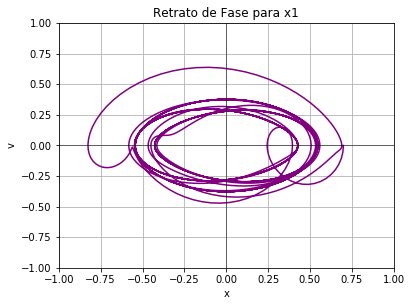

In [53]:
#Graficamos la solución

import numpy 
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig, ylabel
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('dosresortes4_1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('x')
ylabel('v')
grid(True)
lw = 1.5

plot(x1, y1, 'purple', linewidth=lw)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

plt.xlim(-1,1)
plt.ylim(-1,1)

title('Retrato de Fase para x1')
savefig('Ej4_11.png', dpi=100)

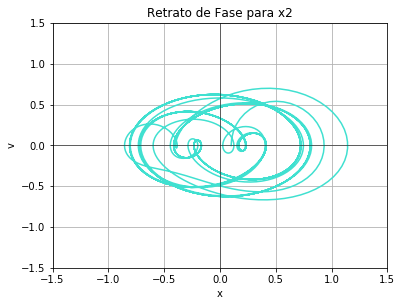

In [54]:
figure(1, figsize=(6, 4.5))

xlabel('x')
ylabel('v')
grid(True)
lw = 1.5

plot(x2, y2, "turquoise", linewidth=lw)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)

title('Retrato de Fase para x2')
savefig('Ej4_12.png', dpi=100)

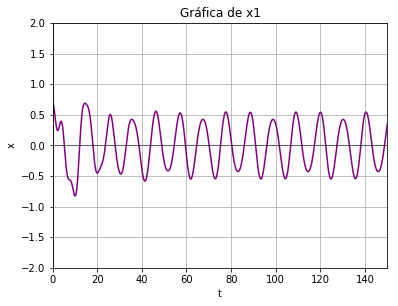

In [55]:
figure(1, figsize=(6, 4.5))

xlabel('t')
ylabel('x')
grid(True)
lw = 1.5

plot(t, x1, 'purple', linewidth=lw)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

plt.xlim(0,150)
plt.ylim(-2,2)

title('Gráfica de x1')
savefig('Ej4_13.png', dpi=100)

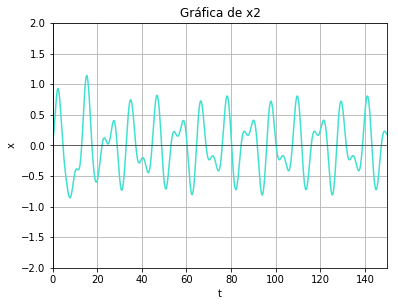

In [56]:
figure(1, figsize=(6, 4.5))

xlabel('t')
ylabel('x')
grid(True)
lw = 1.5

plot(t, x2, 'turquoise', linewidth=lw)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

plt.xlim(0,150)
plt.ylim(-2,2)

title('Gráfica de x2')
savefig('Ej4_14.png', dpi=100)

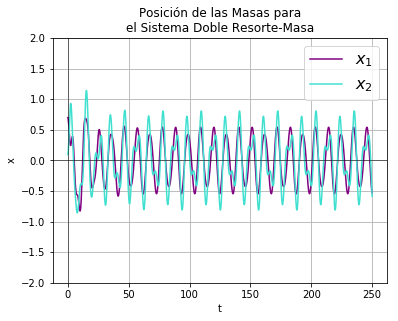

In [62]:
t, x1, y1, x2, y2 = loadtxt('dosresortes4_1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
ylabel('x')
grid(True)
lw = 1.5

plot(t, x1, 'purple', linewidth=lw)
plot(t, x2, 'turquoise', linewidth=lw)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

y = [-2, -1.5, -1,-0.5,0,0.5,1,1.5,2]
plt.yticks(y)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Posición de las Masas para\nel Sistema Doble Resorte-Masa')
savefig('Ej4_17.png', dpi=100)

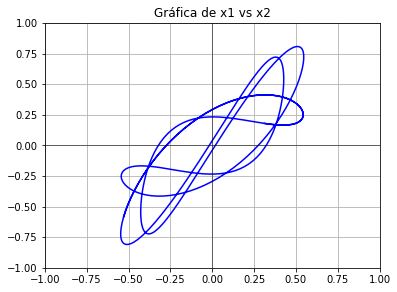

In [63]:
t, x1, y1, x2, y2 = loadtxt('dosresortes4_1.dat', unpack=True, skiprows=1828)

figure(1, figsize=(6, 4.5))

grid(True)
lw = 1.5

plot(x1, x2, 'blue', linewidth=lw)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

plt.xlim(-1,1)
plt.ylim(-1,1)

title('Gráfica de x1 vs x2')
savefig('Ej4_18.png', dpi=100)

In [64]:
#Usamos la funcion ODEINT para resolver las ecuaciones diferenciales definidas por el vector
from scipy.integrate import odeint

# Valor de los parametros
# Masas:
m1 = 1.0
m2 = 1.0
# Constante del resorte
k1 = (2.0/5.0)
k2 = 1
# Longitudes naturales
L1 = 0.0
L2 = 0.0
# Coeficientes de fricción
b1 = (1.0/10.0)
b2 = (1.0/5.0)
# Coeficiente de no linealidad
n1 = (1.0/6.0)
n2 = (1.0/10.0)
#Amplitud
F1 = (1.0/3.0)
F2 = (1.0/5.0)
#Frecuencia
w1 = 1
w2 = (3.0/5.0)

# Condiciones iniciales
# x1 and x2 son las pocisiones iniciales(contando la longitud de L), y y1 y y2 son las velocidades
x1 = 0.7
y1 = 0
x2 = 0.1
y2 = 0

# Parametros de la ED
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 2000.0
numpoints = 2150

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2, n1, n2, F1, F2, w1, w2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('dosresortes4_2.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print (t1, w1[0], w1[1], w1[2], w1[3],file=f)

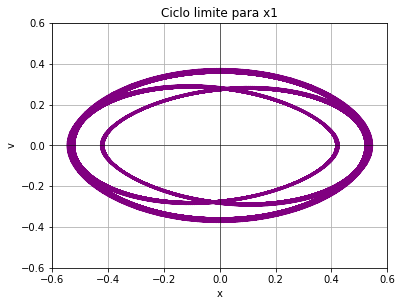

In [65]:
t_1, x1_2, y1_2, x2_2, y2_2 = loadtxt('dosresortes4_2.dat', unpack=True, skiprows=718)

figure(1, figsize=(6, 4.5))

xlabel('x')
ylabel('v')
grid(True)
lw = 1.5

plot(x1_2, y1_2, 'purple', linewidth=lw)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

plt.xlim(-0.6,0.6)
plt.ylim(-0.6,0.6)

title('Ciclo limite para x1')
savefig('Ej4_15.png', dpi=100)

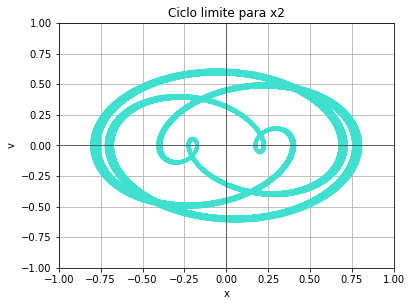

In [66]:
figure(1, figsize=(6, 4.5))

xlabel('x')
ylabel('v')
grid(True)
lw = 1.5

plot(x2_2, y2_2, 'turquoise', linewidth=lw)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

plt.xlim(-1,1)
plt.ylim(-1,1)

title('Ciclo limite para x2')
savefig('Ej4_16.png', dpi=100)